In [11]:
import numpy
import matplotlib.pyplot as plt

In [12]:
ny=51
nx=51
dx=2/(nx-1)
dy=2/(ny-1)


In [13]:
p=numpy.zeros((ny,nx))



In [14]:
def possion(p,dy,dx,target_error):
    error=1
    b=p.copy()
    b[int(ny/4),int(nx/4)]=100
    b[int(3/4*ny),int(3/4*nx)]=-100
    while error>target_error :
        pn=p.copy()
        
        p[1:-1,1:-1]=((dy**2 *(pn[1:-1,2:]+p[1:-1,0:-2])+
                        dx**2*(pn[2:,1:-1]+pn[0:-2,1:-1])-
                        b[1:-1,1:-1]*dx**2 * dy**2)/
                        (2*(dx**2+dy**2)))
        
        p[:,0]=0
        p[:,-1]=0
        p[0,:]=0
        p[-1,:]=0
        
        error=(numpy.sum(numpy.abs(p[:])-numpy.abs(pn[:]))/numpy.sum(numpy.abs(pn[:])))

    return p  

In [15]:
def plot_2d(x,y,p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = plt.axes(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=plt.cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

C:\Users\USER\AppData\Local\Temp\ipykernel_19784\3675047305.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  error=(numpy.sum(numpy.abs(p[:])-numpy.abs(pn[:]))/numpy.sum(numpy.abs(pn[:])))


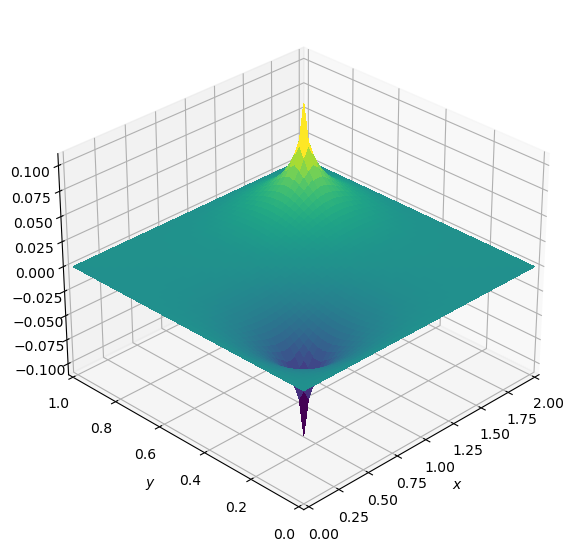

In [16]:
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,1,ny)
p=possion(p,dy,dx,.001)
plot_2d(x,y,p)